<h2>Introduction</h2>

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area of California.  It started in August 2013 as Bay Area Bike Share, before it established a partnership with Ford Motor Company and rebranded itself as Ford GoBike in June 2017.

The Ford GoBike system is an integral part of the Bay Area’s transportation network. With more than 300 stations and 3,000 bikes on the ground across San Francisco, San Jose, Berkeley, Oakland and Emeryville, the system has generated over two million rides since launching in June 2017. At the forefront of bikeshare innovation, the system features the popular Ford GoBike Plus ebikes to help riders easily summit Bay Area hills as well as 200 dockless bikes in North San Jose. When completed, the 7,000-bike, 546-station Ford GoBike network will be the second-largest bike share system in North America, setting new national standards in density, convenience and equity. Ford GoBike is powered by Lyft, North America’s bike share leader.

As of June 2019, the system rebranded itself again as Bay Wheels, after its partnership with Ford ended and Lyft absorbed Bay Area Bike Share.  For this project, we will examine data from the most recent dataset prior to the system's new rebranding (i.e., April 2019).

<h2>Preliminary Wrangling</h2>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
# We'll call our dataframe 'gobike'
gobike = pd.read_csv('201904-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition of the
# gobike dataframe
print(gobike.shape)
print(gobike.dtypes)
print(gobike.head(10))

(239111, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         50305  2019-04-30 22:33:55.1550  2019-05-01 12:32:20.4540   
1         53725  2019-04-30 20:43:41.6320  2019-05-01 11:39:06.9170   
2         78072  2019-04-30 10:32:46.4890  2019-05-01 08:13:58.9750   
3         78969  2019-04-30 10:00:51.5500  2019-05-01 07:57:01.2620   
4          1128  2019-04-30 23:59:04.7390  2019-05-01 00:1

In [4]:
# Print out descriptive statistics, including mean, standard deviation, min, max, etc.
print(gobike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  239111.000000     239047.000000           239111.000000   
mean      802.671199        141.836538               37.769536   
std      1990.006091        116.289776                0.127698   
min        61.000000          3.000000                0.000000   
25%       349.000000         47.000000               37.770083   
50%       558.000000        104.000000               37.780760   
75%       876.000000        240.000000               37.797280   
max     86114.000000        420.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            239111.000000   239047.000000         239111.000000   
mean               -122.352503      140.838099             37.766996   
std                   0.277088      116.386168              0.343083   
min                -122.453704        3.000000              0.000000   
25%                -122.413004       44.00000

In [5]:
# Print out additional statistics
gobike.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id              64
start_station_name            64
start_station_latitude         0
start_station_longitude        0
end_station_id                64
end_station_name              64
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          11199
member_gender              11199
bike_share_for_all_trip        0
dtype: int64

In [6]:
# Remove rows that do not have gender value
gobike_clean = gobike[gobike['member_gender'].isnull() == False]

In [7]:
# Print out the number of male and female riders
gobike_clean['member_gender'].value_counts()

Male      168140
Female     55498
Other       4274
Name: member_gender, dtype: int64

In [8]:
# Print out the number of subscribers and customers to the Bay Wheels service
gobike_clean['user_type'].value_counts()

Subscriber    198510
Customer       29402
Name: user_type, dtype: int64

In [9]:
# Remove rows that do not have start station id
gobike_clean = gobike_clean[gobike_clean['start_station_id'].isnull() == False]
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             227848 non-null  int64  
 1   start_time               227848 non-null  object 
 2   end_time                 227848 non-null  object 
 3   start_station_id         227848 non-null  float64
 4   start_station_name       227848 non-null  object 
 5   start_station_latitude   227848 non-null  float64
 6   start_station_longitude  227848 non-null  float64
 7   end_station_id           227848 non-null  float64
 8   end_station_name         227848 non-null  object 
 9   end_station_latitude     227848 non-null  float64
 10  end_station_longitude    227848 non-null  float64
 11  bike_id                  227848 non-null  int64  
 12  user_type                227848 non-null  object 
 13  member_birth_year        227848 non-null  float64
 14  memb

In [10]:
gobike_clean.duplicated().sum()

0

In [11]:
# Change start_time and end_time to datetime format
gobike_clean.start_time = pd.to_datetime(gobike_clean.start_time)
gobike_clean.end_time = pd.to_datetime(gobike_clean.end_time)

In [12]:
# Extract dayofweek, hours information from the start_time
gobike_clean['start_time_dayofweek']= gobike_clean['start_time'].dt.strftime('%a')
gobike_clean['start_time_hour']= gobike_clean['start_time'].dt.hour

In [13]:
# Print the updated data
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             227848 non-null  int64         
 1   start_time               227848 non-null  datetime64[ns]
 2   end_time                 227848 non-null  datetime64[ns]
 3   start_station_id         227848 non-null  float64       
 4   start_station_name       227848 non-null  object        
 5   start_station_latitude   227848 non-null  float64       
 6   start_station_longitude  227848 non-null  float64       
 7   end_station_id           227848 non-null  float64       
 8   end_station_name         227848 non-null  object        
 9   end_station_latitude     227848 non-null  float64       
 10  end_station_longitude    227848 non-null  float64       
 11  bike_id                  227848 non-null  int64         
 12  user_type       

In [14]:
# Print the first ten rows of the updated dataframe
print(gobike_clean.head(10))

    duration_sec              start_time                end_time  \
0          50305 2019-04-30 22:33:55.155 2019-05-01 12:32:20.454   
2          78072 2019-04-30 10:32:46.489 2019-05-01 08:13:58.975   
3          78969 2019-04-30 10:00:51.550 2019-05-01 07:57:01.262   
4           1128 2019-04-30 23:59:04.739 2019-05-01 00:17:53.091   
5           1388 2019-04-30 23:53:05.982 2019-05-01 00:16:14.313   
6            920 2019-04-30 23:57:56.340 2019-05-01 00:13:16.454   
7            725 2019-04-30 23:56:11.219 2019-05-01 00:08:16.915   
8            488 2019-04-30 23:59:00.660 2019-05-01 00:07:08.975   
9            792 2019-04-30 23:53:37.604 2019-05-01 00:06:50.405   
10           464 2019-04-30 23:56:44.386 2019-05-01 00:04:28.912   

    start_station_id                                 start_station_name  \
0              368.0                               Myrtle St at Polk St   
2               64.0                               5th St at Brannan St   
3               67.0  San 

In [15]:
# Without the print statement
gobike_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No,Tue,22
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No,Tue,10
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No,Tue,10
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No,Tue,23
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997.0,Male,No,Tue,23
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976.0,Male,Yes,Tue,23
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973.0,Male,No,Tue,23
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986.0,Male,No,Tue,23
9,792,2019-04-30 23:53:37.604,2019-05-01 00:06:50.405,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995.0,Male,No,Tue,23
10,464,2019-04-30 23:56:44.386,2019-05-01 00:04:28.912,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984.0,Male,No,Tue,23


In [16]:
gobike_clean['start_time_dayofweek'].value_counts()

Tue    41856
Mon    39296
Thu    37234
Wed    37222
Fri    33733
Sat    21475
Sun    17032
Name: start_time_dayofweek, dtype: int64

In [17]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
gobike_clean['start_time_dayofweek'] = gobike_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [18]:
# Print the updated datatypes for the clean gobike data
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             227848 non-null  int64         
 1   start_time               227848 non-null  datetime64[ns]
 2   end_time                 227848 non-null  datetime64[ns]
 3   start_station_id         227848 non-null  float64       
 4   start_station_name       227848 non-null  object        
 5   start_station_latitude   227848 non-null  float64       
 6   start_station_longitude  227848 non-null  float64       
 7   end_station_id           227848 non-null  float64       
 8   end_station_name         227848 non-null  object        
 9   end_station_latitude     227848 non-null  float64       
 10  end_station_longitude    227848 non-null  float64       
 11  bike_id                  227848 non-null  int64         
 12  user_type       

In [19]:
# Calculate member_age from member_birth_year.
gobike_clean['member_age'] = 2019 - gobike_clean['member_birth_year']
gobike_clean['member_age'] = gobike_clean['member_age'].astype(int)
gobike_clean['member_birth_year'] = gobike_clean['member_birth_year'].astype(int)

In [20]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             227848 non-null  int64         
 1   start_time               227848 non-null  datetime64[ns]
 2   end_time                 227848 non-null  datetime64[ns]
 3   start_station_id         227848 non-null  float64       
 4   start_station_name       227848 non-null  object        
 5   start_station_latitude   227848 non-null  float64       
 6   start_station_longitude  227848 non-null  float64       
 7   end_station_id           227848 non-null  float64       
 8   end_station_name         227848 non-null  object        
 9   end_station_latitude     227848 non-null  float64       
 10  end_station_longitude    227848 non-null  float64       
 11  bike_id                  227848 non-null  int64         
 12  user_type       

In [21]:
gobike_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989,Female,No,Tue,22,30
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993,Male,No,Tue,10,26
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972,Male,No,Tue,10,47
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973,Male,No,Tue,23,46
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997,Male,No,Tue,23,22
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976,Male,Yes,Tue,23,43
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973,Male,No,Tue,23,46
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986,Male,No,Tue,23,33
9,792,2019-04-30 23:53:37.604,2019-05-01 00:06:50.405,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995,Male,No,Tue,23,24
10,464,2019-04-30 23:56:44.386,2019-05-01 00:04:28.912,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984,Male,No,Tue,23,35


<h2>What is the structure of your dataset?</h2>

The Ford GoBike dataset contains over 200,000 entries of bike rides in the San Francisco Bay Area.  Among the data included in this data set:

<UL>
    <LI>Start time and end time of bike ride</LI>
    <LI>Station IDs where the bike ride began and where it ended</LI>
    <LI>Name of the stations where the bike ride began and where it ended</LI>
    <LI>The type of individual using the GoBike service (subscriber or customer)</LI>
    <LI>Birth years and genders of the subscribers or customers using the GoBike service</LI>
</UL>

<H3>What is/are the main feature(s) of interest in your dataset?</H3>

For this project, we will investigate duration of bike rides.

<h3>What features in the dataset do you think will help support your investigation into your feature(s) of interest?</h3>

The features that will be of interest to us include the start time, end time, gender, and type of user.

<h2>Univariate Exploration</h2>

In [22]:
# Store the data for duration_min by calculating the time by 60 seconds
gobike_clean['duration_min'] = gobike_clean['duration_sec']/60
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227848 entries, 0 to 239110
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             227848 non-null  int64         
 1   start_time               227848 non-null  datetime64[ns]
 2   end_time                 227848 non-null  datetime64[ns]
 3   start_station_id         227848 non-null  float64       
 4   start_station_name       227848 non-null  object        
 5   start_station_latitude   227848 non-null  float64       
 6   start_station_longitude  227848 non-null  float64       
 7   end_station_id           227848 non-null  float64       
 8   end_station_name         227848 non-null  object        
 9   end_station_latitude     227848 non-null  float64       
 10  end_station_longitude    227848 non-null  float64       
 11  bike_id                  227848 non-null  int64         
 12  user_type       

In [23]:
gobike_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989,Female,No,Tue,22,30,838.416667
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993,Male,No,Tue,10,26,1301.200000
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972,Male,No,Tue,10,47,1316.150000
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973,Male,No,Tue,23,46,18.800000
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997,Male,No,Tue,23,22,23.133333
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976,Male,Yes,Tue,23,43,15.333333
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973,Male,No,Tue,23,46,12.083333
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986,Male,No,Tue,23,33,8.133333
9,792,2019-04-30 23:53:37.604,2019-05-01 00:06:50.405,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995,Male,No,Tue,23,24,13.200000
10,464,2019-04-30 23:56:44.386,2019-05-01 00:04:28.912,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984,Male,No,Tue,23,35,7.733333


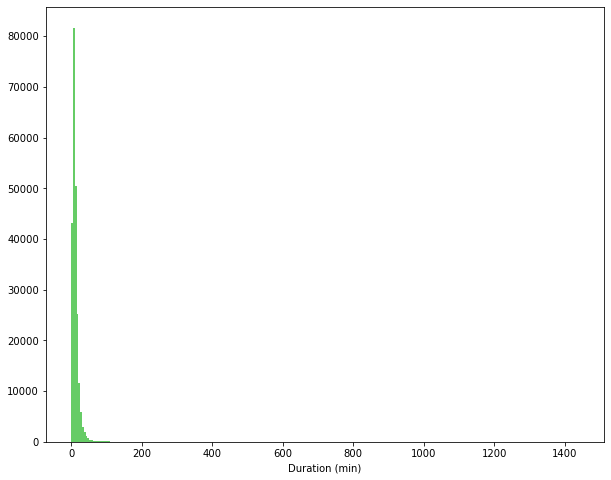

In [24]:
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0, gobike_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = gobike_clean, x = 'duration_min', bins=bins, color="#66CC66");
plt.xlabel('Duration (min)')
plt.show()

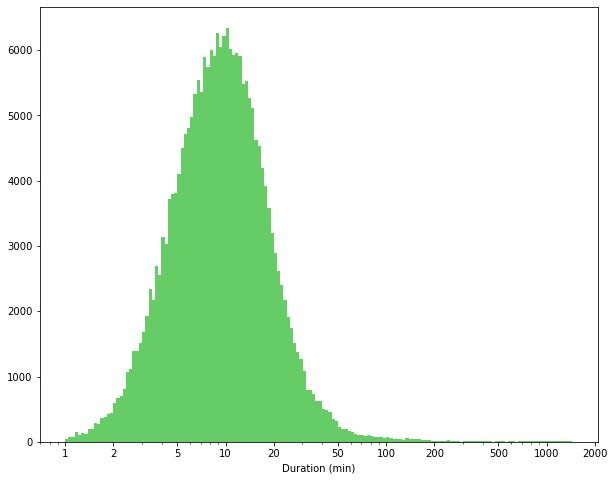

In [25]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.020
bins = 10 ** np.arange(0, np.log10(gobike_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 8]);
plt.hist(data = gobike_clean, x = 'duration_min', bins = bins, color="#66CC66");
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration (min)');
plt.show()

In [26]:
gobike_clean = gobike_clean[gobike_clean['duration_min'] <= 100]
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226804 entries, 4 to 239110
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             226804 non-null  int64         
 1   start_time               226804 non-null  datetime64[ns]
 2   end_time                 226804 non-null  datetime64[ns]
 3   start_station_id         226804 non-null  float64       
 4   start_station_name       226804 non-null  object        
 5   start_station_latitude   226804 non-null  float64       
 6   start_station_longitude  226804 non-null  float64       
 7   end_station_id           226804 non-null  float64       
 8   end_station_name         226804 non-null  object        
 9   end_station_latitude     226804 non-null  float64       
 10  end_station_longitude    226804 non-null  float64       
 11  bike_id                  226804 non-null  int64         
 12  user_type       

In [27]:
gobike_clean['member_age'].describe()

count    226804.000000
mean         34.137008
std           9.954496
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

Something doesn't look quite right.  The maximum age cannot be 141.

In [28]:
# Remove outliers and keep those entries with member_age below 70.
gobike_clean = gobike_clean[gobike_clean['member_age'] <= 70]

In [29]:
gobike_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,duration_min
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973,Male,No,Tue,23,46,18.800000
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,1997,Male,No,Tue,23,22,23.133333
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,1976,Male,Yes,Tue,23,43,15.333333
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,1973,Male,No,Tue,23,46,12.083333
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,1986,Male,No,Tue,23,33,8.133333
9,792,2019-04-30 23:53:37.604,2019-05-01 00:06:50.405,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,1995,Male,No,Tue,23,24,13.200000
10,464,2019-04-30 23:56:44.386,2019-05-01 00:04:28.912,89.0,Division St at Potrero Ave,37.769218,-122.407646,97.0,14th St at Mission St,37.768265,-122.420110,3048,Subscriber,1984,Male,No,Tue,23,35,7.733333
11,782,2019-04-30 23:50:49.144,2019-05-01 00:03:51.847,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,276.0,Julian St at The Alameda,37.332233,-121.912517,3426,Subscriber,1992,Male,Yes,Tue,23,27,13.033333
12,775,2019-04-30 23:49:05.388,2019-05-01 00:02:00.545,86.0,Market St at Dolores St,37.769305,-122.426826,321.0,5th St at Folsom,37.780146,-122.403071,2198,Subscriber,1994,Male,No,Tue,23,25,12.916667
13,424,2019-04-30 23:52:57.431,2019-05-01 00:00:02.294,223.0,16th St Mission BART Station 2,37.764765,-122.420091,109.0,17th St at Valencia St,37.763316,-122.421904,1113,Subscriber,1990,Male,No,Tue,23,29,7.066667


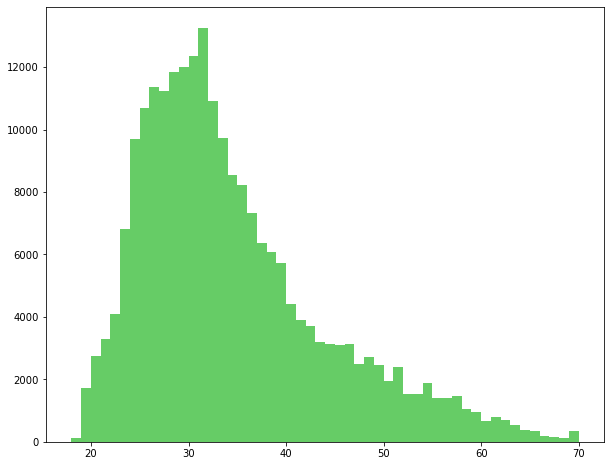

In [30]:
binsize = 1
bins = np.arange(18, gobike_clean['member_age'].max()+binsize, binsize)
plt.figure(figsize=[10, 8]);
plt.hist(data = gobike_clean, x = 'member_age', bins = bins, color="#66CC66");

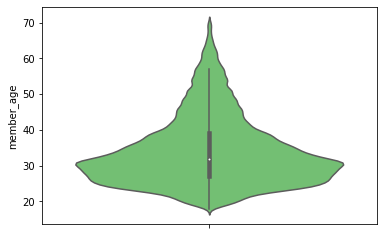

In [31]:
sb.violinplot(data = gobike_clean, y = 'member_age', color="#66CC66");

In [32]:
# save cleaned data 
gobike_clean.to_csv('gobike_clean_master.csv', index=False)

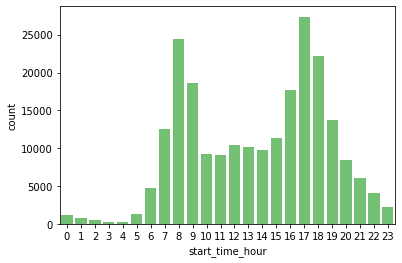

In [33]:
# Determining times which have the highest and lowest number of riders
sb.countplot(data = gobike_clean, x = 'start_time_hour', color = "#66CC66");

According to the above graph, riding times at 8:00 AM and 5:00 PM are the highest and have the most riders; riding time at 4:00 AM is the lowest with the fewest riders.

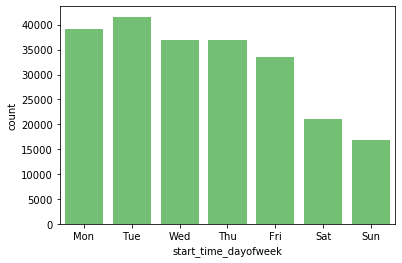

In [34]:
# Determining which days of the week have the most riders
sb.countplot(data = gobike_clean, x = 'start_time_dayofweek', color = "#66CC66");

According to the above graph, one would think Saturday or Sunday has the most riders.  It turns out, Tuesday has the most riders (whereas Sunday has the fewest).

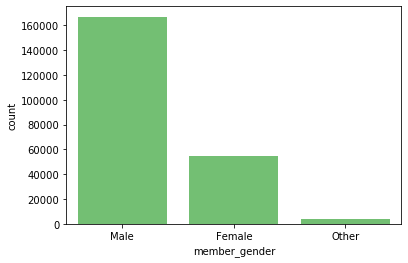

In [35]:
# Determining which gender has the most riders
sb.countplot(data = gobike_clean, x = 'member_gender', color = "#66CC66");

The graph above shows that of the total number of riders, the majority of them are male.

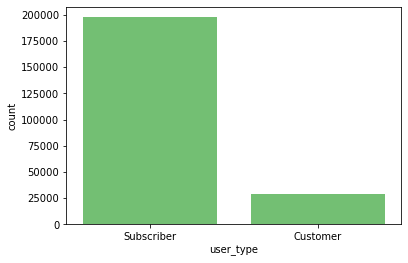

In [36]:
# Determining subscribers versus customers
sb.countplot(data = gobike_clean, x = 'user_type', color = "#66CC66");

There are more subscribers than customers.  Almost 200,000 subscribers of the GoBike program, versus 25,000 customers.

<h2>Bivariate Exploration</h2>

To start off with, I want to look at the pairwise correlations present between features in the data.

In [37]:
customer = gobike_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = gobike_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / gobike_clean['bike_id'].count()
subscriber_proportion = subscriber / gobike_clean['bike_id'].count()

In [38]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age', 'duration_min']
numeric_vars = ['duration_min', 'member_age']
categoric_vars = ['start_time_dayofweek', 'start_time_hour', 'member_gender', 'user_type']

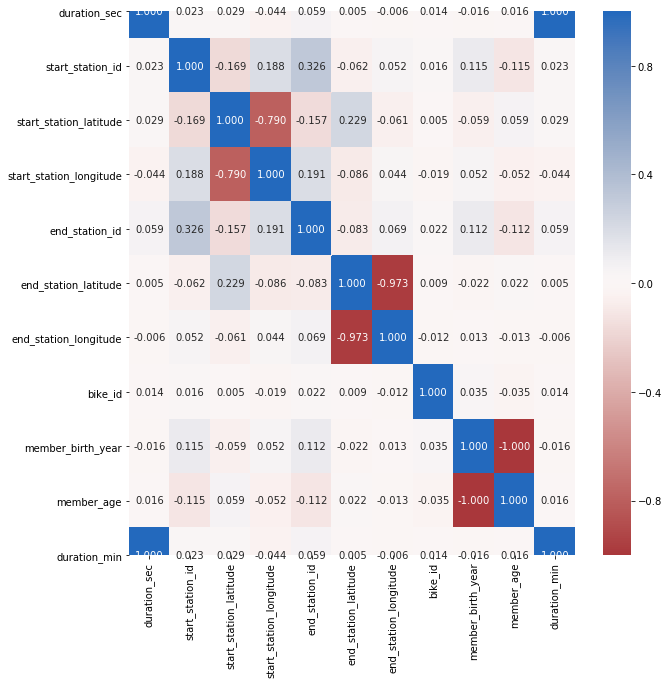

In [39]:
# correlation plot
plt.figure(figsize = [10, 10])
sb.heatmap(gobike_clean[all_numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);
plt.show()

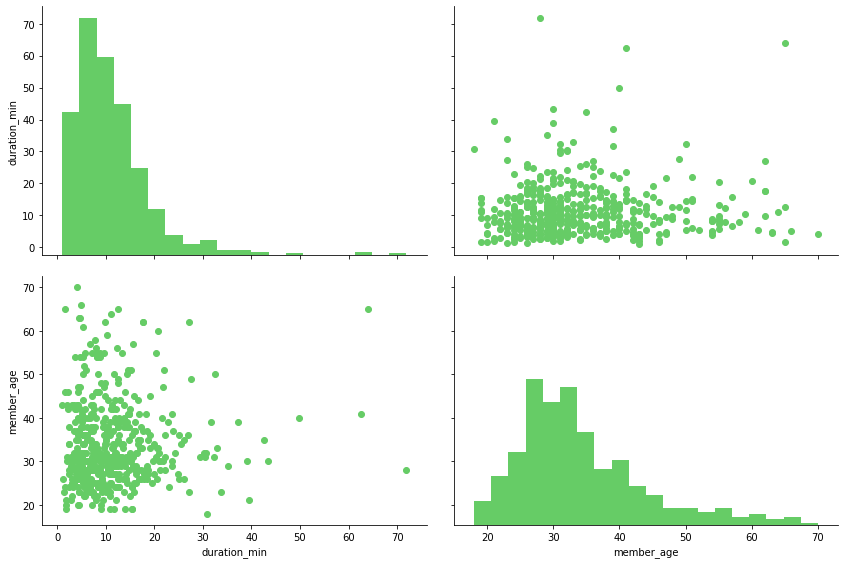

In [40]:
# plot matrix: sample 500 records so that plots are clearer and
# they render faster
# note: .loc is no longer supported in Python 3; this has to be changed to .iloc
# in order for the function to work

samples = np.random.choice(gobike_clean.shape[0], 500, replace = False)
gobike_samp = gobike_clean.iloc[samples, :]

g = sb.PairGrid(data = gobike_samp, vars = numeric_vars, height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20, color="#66CC66");
g.map_offdiag(plt.scatter, color="#66CC66");

The charts on the left show something of a correlation when the duration is 20 minutes and member age is 30.  However, the two attributes are not linear with one another, and there is overall no correlation.

<Figure size 1080x1080 with 0 Axes>

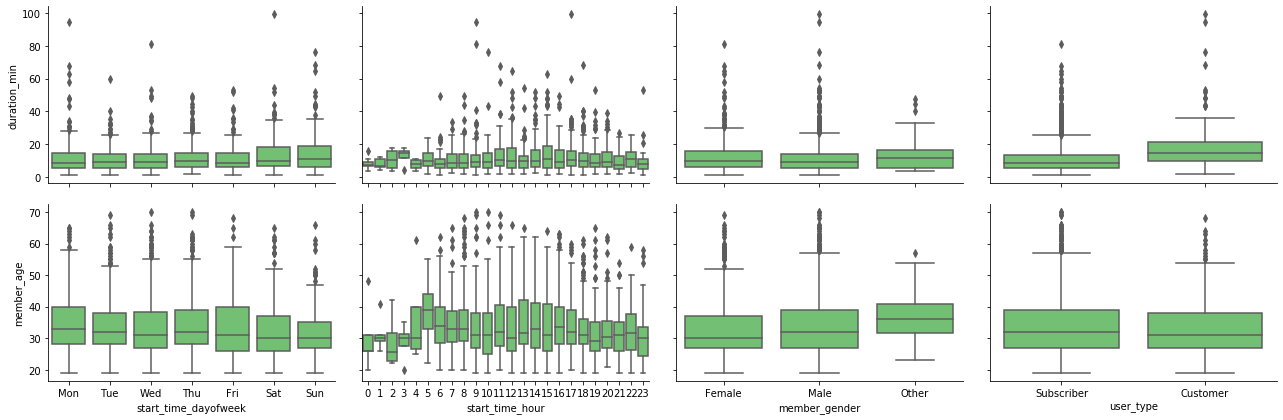

In [41]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(gobike_clean.shape[0], 2000, replace = False);
gobike_samp = gobike_clean.iloc[samples, :];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    #default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = "#66CC66");

plt.figure(figsize = [15, 15]);
g = sb.PairGrid(data = gobike_samp, y_vars = ['duration_min', 'member_age'], x_vars = categoric_vars, height = 3, aspect = 1.5);
g.map(boxgrid);

<h3>Observations</h3>

1.  Earlier I had mentioned that Saturday and Sunday had fewer riders than other days in the week.  Saturday and Sunday have fewer riders, but the durations of the bike rides are much longer.
2.  The average age of male bikers is greater than the average age of female bikers, but females bike longer than males.  This is probably expected because of the age differences between the two genders.
3.  The average age of Subscribers is greater than the average age of Customers, but Customers bike longer than Subscribers.

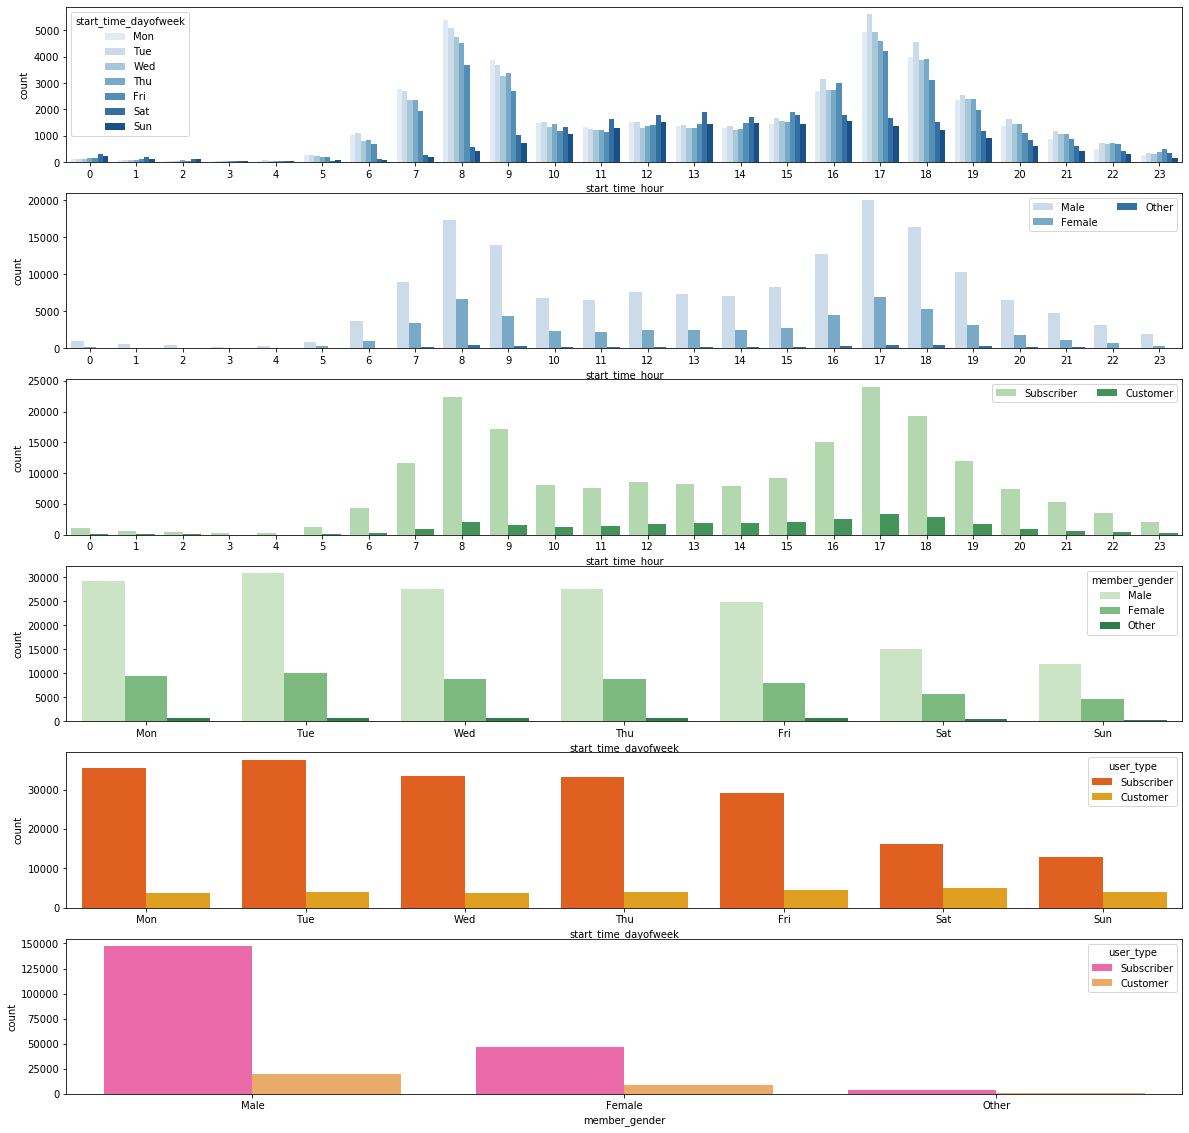

In [42]:
plt.figure(figsize = [20, 20]);

plt.subplot(6, 1, 1);
sb.countplot(data = gobike_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'Blues');

ax = plt.subplot(6, 1, 2);
sb.countplot(data = gobike_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping

ax = plt.subplot(6, 1, 3);
sb.countplot(data = gobike_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(6, 1, 4);
sb.countplot(data = gobike_clean, x = 'start_time_dayofweek', hue = 'member_gender', palette = 'Greens');

ax = plt.subplot(6, 1, 5);
sb.countplot(data = gobike_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'autumn');

ax = plt.subplot(6, 1, 6);

sb.countplot(data = gobike_clean, x = 'member_gender', hue = 'user_type', palette = 'spring');

<h3>Observations</h3>

1.  Most Subscribers and Customers are male.
2.  Most Subscribers bike on Tuesday than any other day in the week; most Customers bike on Saturday.
3.  8:00 AM and 5:00 PM are peak bike riding times for both Subscribers and Customers.
4.  Males and females bike ride on Tuesday (with more males than females).

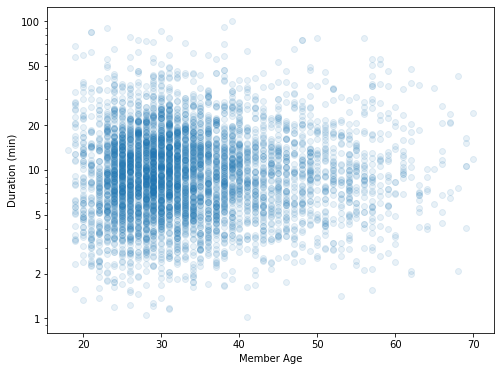

In [43]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
samples = np.random.choice(gobike_clean.shape[0], 5000, replace = False)
gobike_samp = gobike_clean.iloc[samples,:]

plt.figure(figsize = [8, 6]);
plt.scatter(data = gobike_samp, x = 'member_age', y = 'duration_min', alpha = 1/10);
#plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

In [44]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

gobike_clean['log_duration_min'] = gobike_clean['duration_min'].apply(log_trans)

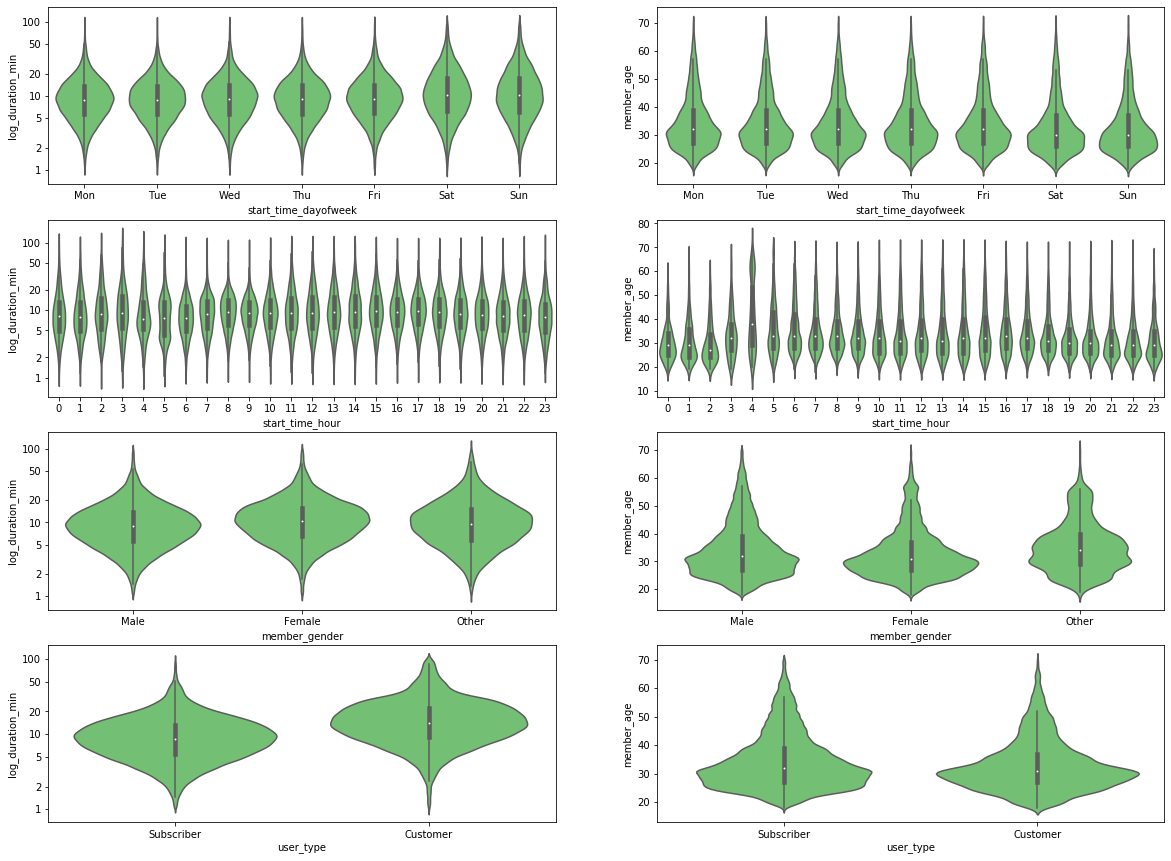

In [45]:
# plot the categorical variables against duration_min and member_age again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [20,15])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = gobike_clean, x = var, y = 'log_duration_min', ax = ax[i,0], color = "#66CC66");
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.violinplot(data = gobike_clean, x = var, y = 'member_age', ax = ax[i,1], color = "#66CC66");

<h3>Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?</h3>

1.  Saturday and Sunday had fewer riders, but longer durations of bike rides
2.  More Customers rode bikes on Saturday than other days of the week
3.  Females bike longer than males; the mean bike durations demonstrate this
5.  Mean bike durations are longer for Customers than Subscribers

<h3>Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?</h3>

1.  Tuesday has the following:  Highest bike counts, most Subscribers, highest mean age of bikers, most bikers among males and females
2.  Saturday has the following:  Most Customers
3.  Sunday has the following:  Lowest mean age of bikers
5.  The time in which has the most male bikers, most Subscribers, most Customers, most males and females:  5:00 PM

<h2>Multivariate Exploration</h2>

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between Member Age and Duration.

In [46]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, gobike_clean['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

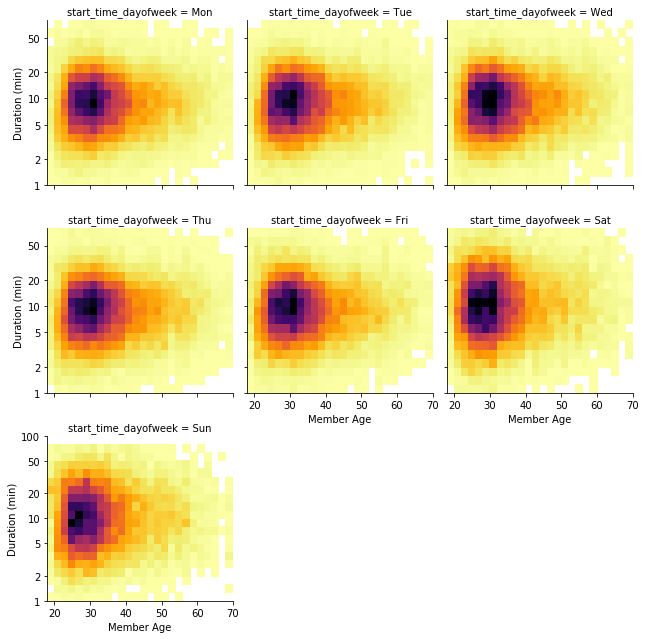

In [47]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = gobike_clean, col = 'start_time_dayofweek', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

<h3>Observations</h3>

Bike rides on Saturday and Sunday have longer durations than other days of the week.

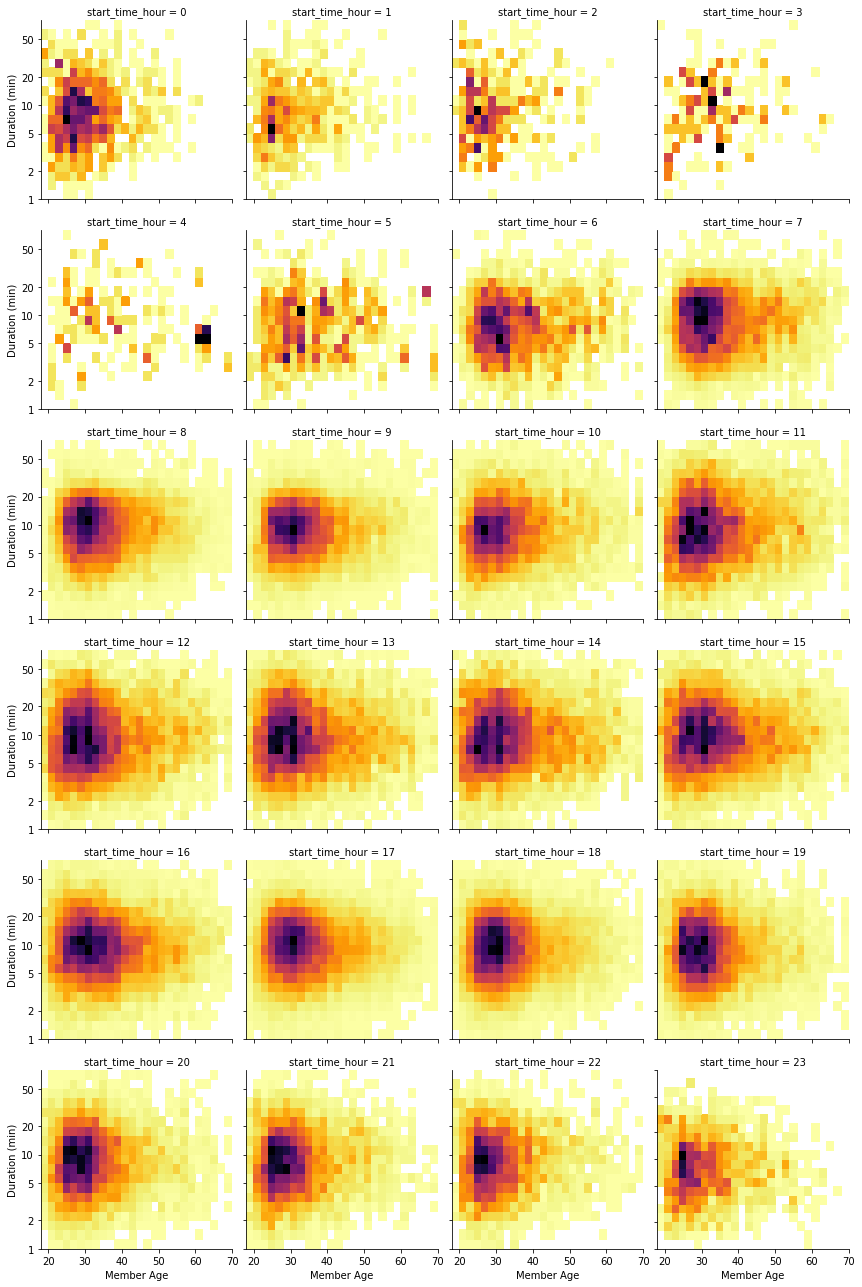

In [48]:
g = sb.FacetGrid(data = gobike_clean, col = 'start_time_hour', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

<h3>Observations</h3>

4:00 AM has the fewest bike riders; 5:00 PM has the most bike riders.

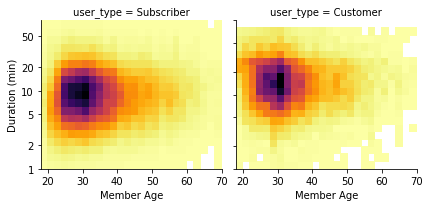

In [49]:
g = sb.FacetGrid(data = gobike_clean, col = 'user_type', height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

<h3>Observations</h3>

Customers bike longer than Subscribers.

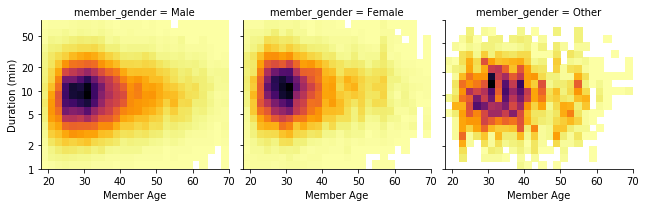

In [50]:
g = sb.FacetGrid(data = gobike_clean, col = 'member_gender', height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

<h3>Observations</h3>

More females bike longer than males.

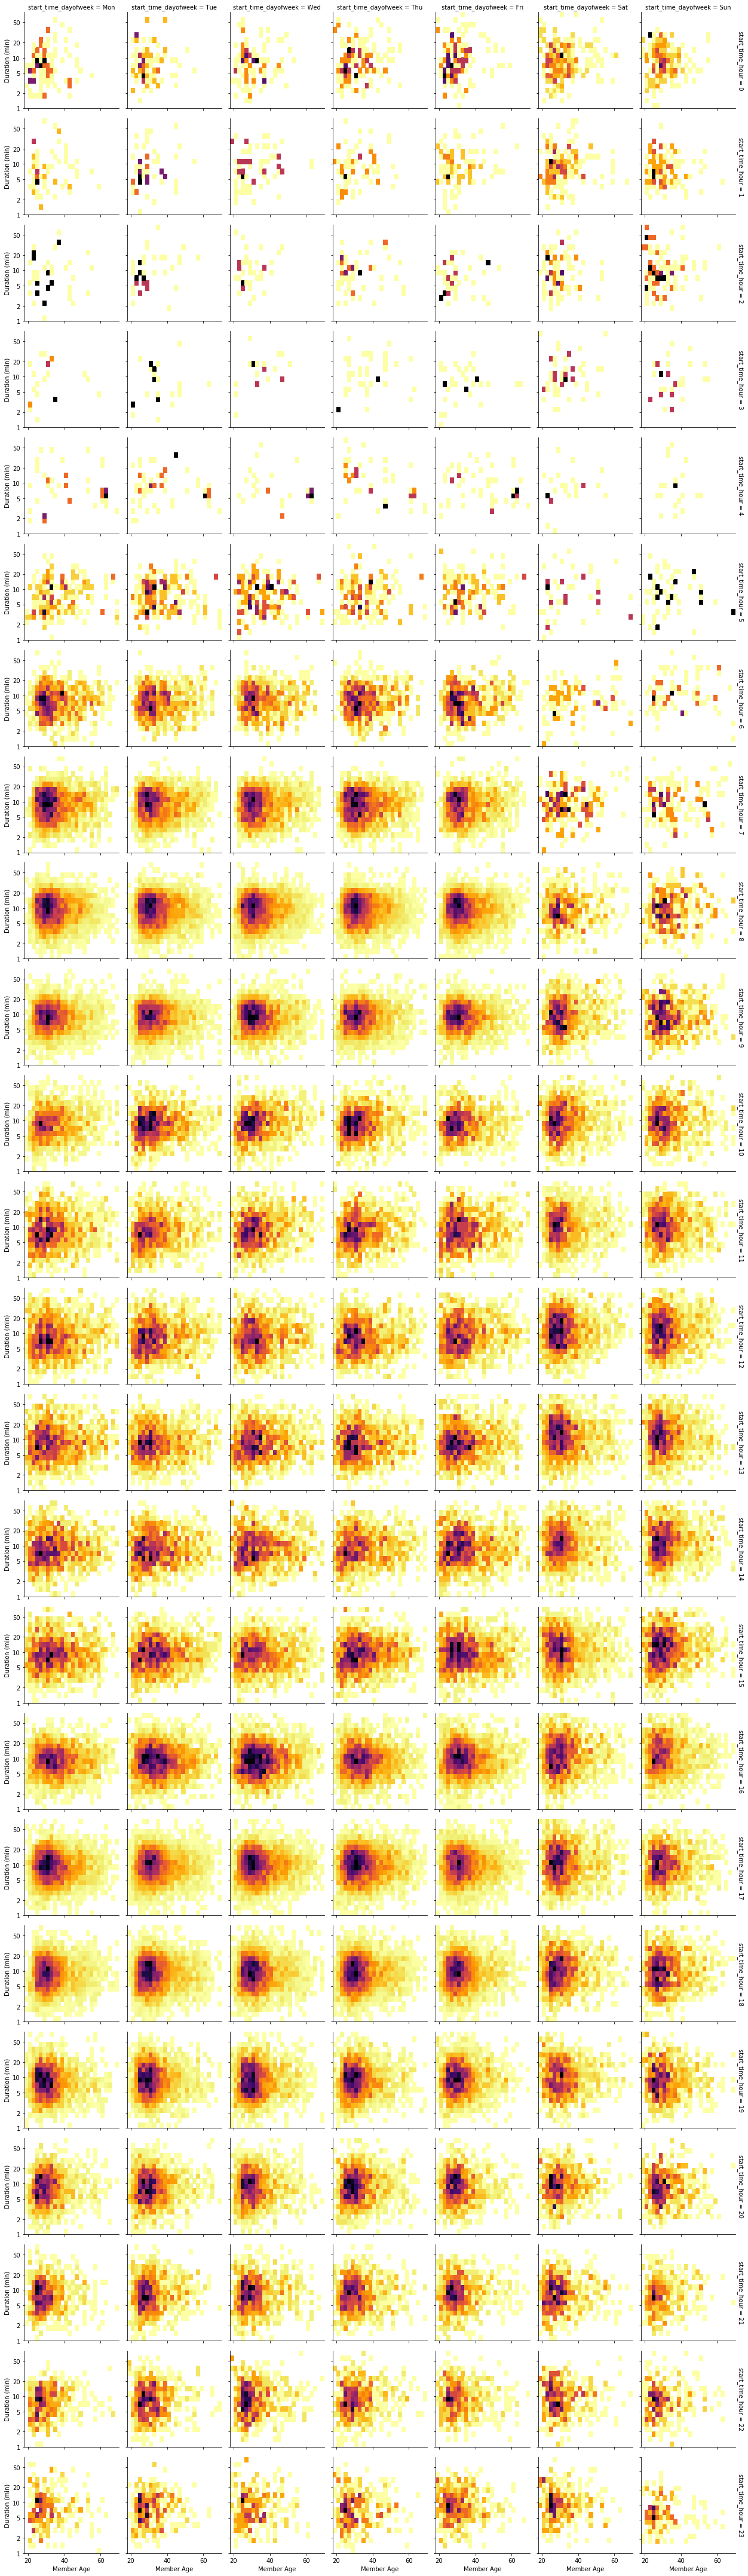

In [51]:
# create faceted heat maps on start_time_dayofweek and start_time_hour
g = sb.FacetGrid(data = gobike_clean, col = 'start_time_dayofweek', row = 'start_time_hour', height = 2.5, margin_titles = True);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

<h3>Observations</h3>

The timeframe between 3:00 AM and 4:00 AM has the fewest riders.  Conversely, Saturday and Sunday has the fewest riders (but as we have already observed, more Customers than Subscribers)

In [52]:
age_flag1 = (gobike_clean['member_age'] < 40)
age_below_forty = gobike_clean.loc[age_flag1,:]

age_flag2 = (gobike_clean['member_age'] >= 40)
age_above_forty = gobike_clean.loc[age_flag2,:]

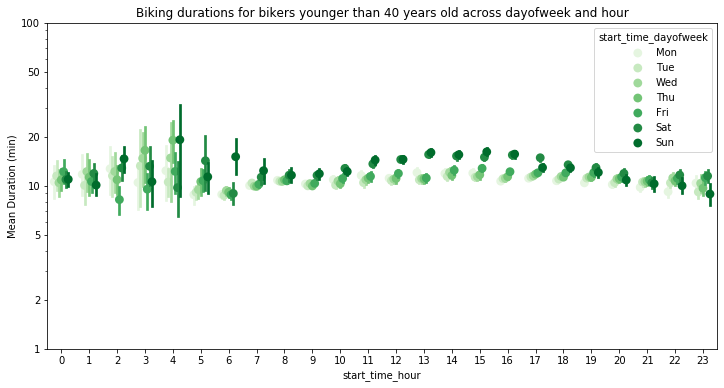

In [53]:
fig = plt.figure(figsize = [12,6])

ax = sb.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Greens', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

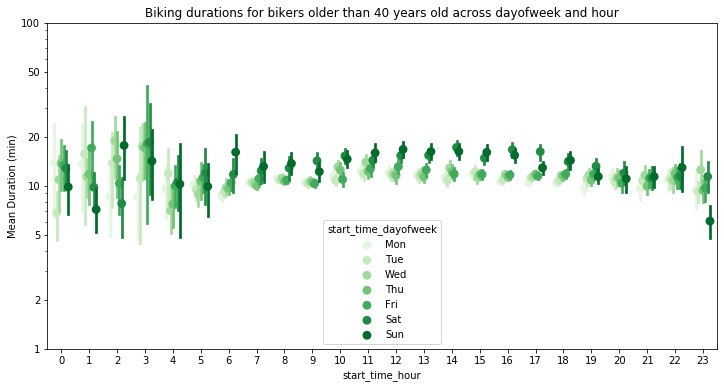

In [54]:
fig = plt.figure(figsize = [12,6])

ax = sb.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_min', hue = 'start_time_dayofweek',
           palette = 'Greens', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

<h3>Observations</h3>

There are more bike riders under the age of 40 spanning across the week

In [ ]:
fig = plt.figure(figsize = [10,8]);

ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

In [ ]:
fig = plt.figure(figsize = [10,8]);

ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'member_gender', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and gender');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

<h3>Observations</h3>

Between the two graphs above, there are fewer bike riders older than the age of 40.  Female bike longer than males.

In [ ]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = age_below_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are younger than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

In [ ]:
fig = plt.figure(figsize = [10,8]);
ax = sb.pointplot(data = age_above_forty, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'Purples', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers who are older than 40 years old across dayofweek and user type');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

<h3>Observations</h3>

Between the two graphs above, there are fewer bikers older than 40.  Customers bike longer than Subscribers.

<h3>Summary of highlights</h3>

1.  Riding times at 8:00 AM and 5:00 PM are the highest and have the most riders
2.  Riding times at 3:00 AM and 4:00 AM are the lowest and have the fewest riders
3.  Saturday and Sunday have fewer riders during the week, but bike rides are longer
4.  Tuesday has the most riders; also has the highest mean age of riders
5.  Female riders bike longer than male riders
6.  Customer riders bike longer than Subscriber riders (and on Saturday more than Sunday or other days of the week)
7.  Most Customer riders are male; this is also true about Subscriber riders